#    Q1.TITANIC SURVIVAL PREDICTION

**-> Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.**

**-> The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.**

In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
m.style.use("dark_background")

### Data Overview:-

In [2]:
survive=p.read_csv("titanic.csv")
survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Here 0 means dead and 1 means survived (in the column of survived)

In [4]:
survive.shape

(891, 12)

###### Total number of Rows=891 and number of Columns=12

In [5]:
survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
survive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### from the above table it is clear that there are 177 missing values in age column and many missing values from Cabin too

### Analysing the Data:-

<Axes: xlabel='Survived', ylabel='count'>

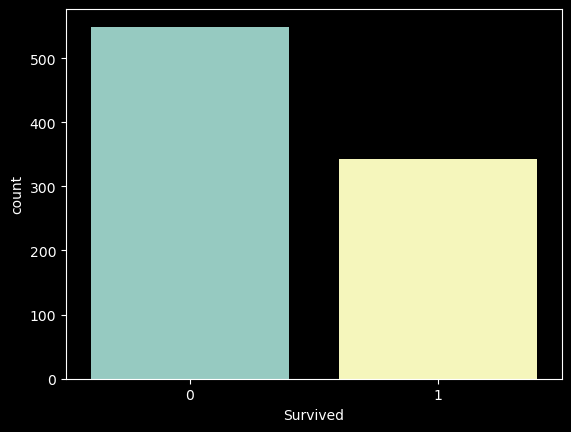

In [5]:
s.countplot(x="Survived",data=survive)

###### from above graph we see that more than 500 people died and near about 350 people survived

<Axes: xlabel='Survived', ylabel='count'>

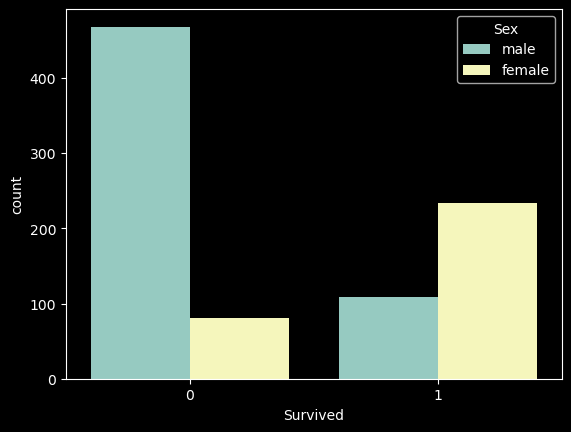

In [6]:
s.countplot(x="Survived",hue="Sex",data=survive)

###### from above graph we see that the number of  people who died are more in males where as the number of  people who survived are more in females

<Axes: xlabel='Survived', ylabel='count'>

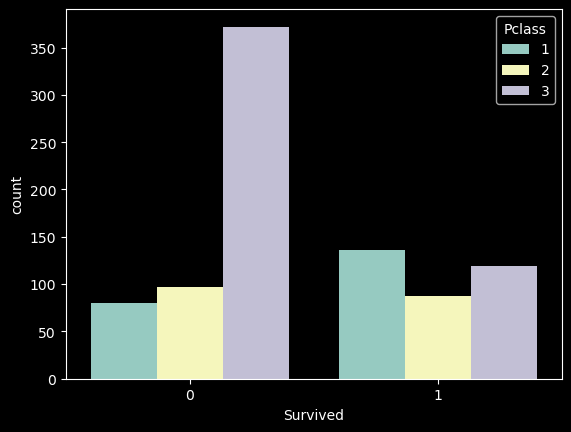

In [7]:
s.countplot(x="Survived",hue="Pclass",data=survive)

###### from above graph we see that the number of death are more in 3rd class passengers where as the number of survivors  are more in 1st class passenger

<Axes: xlabel='Age', ylabel='Frequency'>

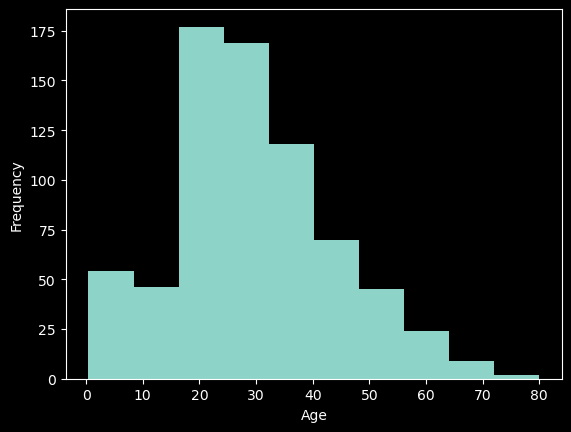

In [8]:
survive['Age'].plot.hist(xlabel="Age")

###### from above graph we see that the people having age group between 20 - 40 are more likely to be present in titanic ship then the older age people

<Axes: xlabel='Fare', ylabel='Frequency'>

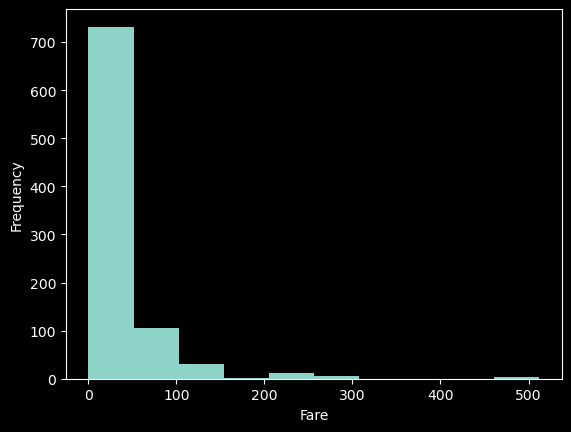

In [9]:
survive["Fare"].plot.hist(xlabel="Fare")

###### From above graph we see that most of the tickets are brought under fare 100 and a very few above fare 100

<Axes: xlabel='SibSp', ylabel='count'>

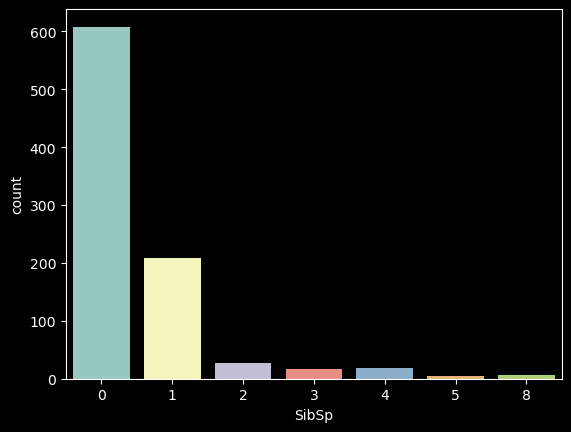

In [10]:
s.countplot(x="SibSp",data=survive)

###### from above graph we see that most of the passengers doesn't have their siblings/spouse on the titanic ship

<Axes: xlabel='Parch', ylabel='count'>

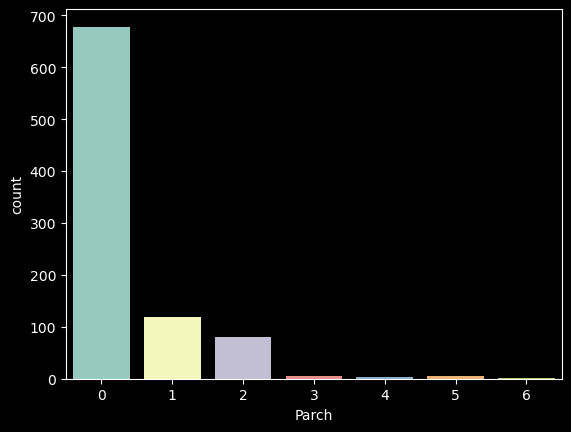

In [11]:
s.countplot(x="Parch",data=survive)

###### from above graph we see that most of the passengers doesn't have their parents/children on the titanic ship

### Cleaning the Data:-

In [12]:
survive.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

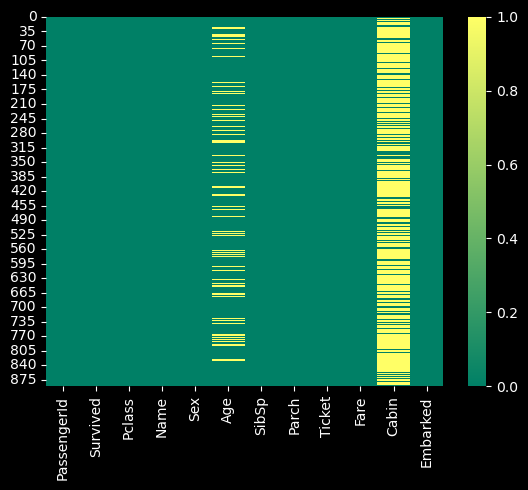

In [13]:
s.heatmap(survive.isnull(),cmap="summer")

###### here yellow color indicates null values which is highest in Cabin and then in Age

<Axes: xlabel='Pclass', ylabel='Age'>

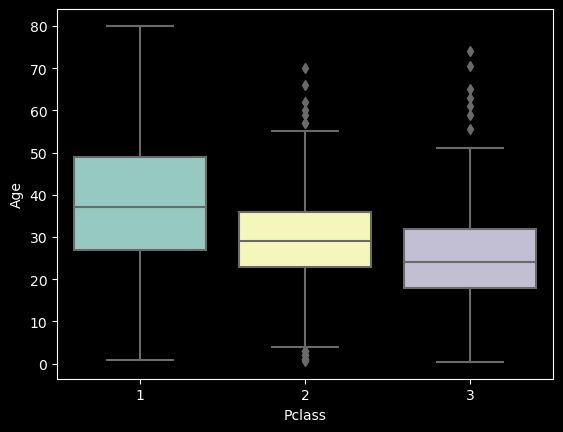

In [14]:
s.boxplot(x="Pclass",y="Age",data=survive)

###### Here we can conclude that older age group people are travelling more in 1st and 2nd class compared to 3rd class 

In [56]:
survive["Age"].fillna(survive['Age'].mean(),inplace=True)

In [45]:
survive.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### here in the null values of age column the mean of age is filled

In [57]:
survive.drop("Cabin",axis=1,inplace=True)

In [58]:
survive.dropna(inplace=True)

In [48]:
survive.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
sex=p.get_dummies(survive['Sex'],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [60]:
embark=p.get_dummies(survive['Embarked'],drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [61]:
pcl=p.get_dummies(survive['Pclass'],drop_first=True)
pcl.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [62]:
survive=p.concat([survive,sex,embark,pcl],axis=1)
survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [63]:
survive.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
survive.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [64]:
survive.replace({True:1 ,False:0},inplace=True)
survive.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


###### here only the rerquired columns are kept and transformed to their dummy values so we can apply logistic regression

### Train and Test Data:-

In [77]:
survive.columns=survive.columns.astype(str)
X=survive.drop("Survived",axis=1)
y=survive["Survived"]

In [78]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
prediction=model.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[144  22]
 [ 23  78]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       166
           1       0.78      0.77      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



### Model Accuracy:-


In [120]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_test,prediction)*100:.2f} %")

Accuracy = 83.15 %
